In [1]:
import numpy as np
import keras
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [ ]:
#Inicializar y abrir archivo
corpus=[]
archivo=open("./dataset_elpino.csv",encoding="utf-8")

#Sacar las variables (features o característica)
header=archivo.readline().strip().split(";")
features=[]
for col in header:
    if col.startswith("Diag") or col.startswith("Proc"):
        col=col.split(" ")
        col=col[0]+col[1]
    features.append(col)

#Sacar la data (deja sólo los códigos en el corpus)
for linea in archivo:
    row=[]
    linea=linea.strip().split(";")
    for i in range(len(linea)):
        col=linea[i].split("-")[0].strip()
        row.append('espacio' if col=='' else ''.join(col.split('.')))
    corpus.append(' '.join(row))
special_tokens=["<mask>"]

In [ ]:
corpus=[
    "el gato es negro",
    "el gato es blanco",
    "el gato es gris",
    "el perro es negro",
    "el perro es blanco",
    "el perro es gris",
]

In [3]:
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences

tokenizer = Tokenizer(filters='!"#$%&()*+,-./:;=?@[\\]^_`{|}~\t\n')
tokenizer.fit_on_texts(corpus+special_tokens)
sequences = tokenizer.texts_to_sequences(corpus)
words=list(tokenizer.word_index.keys())
print(tokenizer.word_index)
vocabulary=len(words)+1
sequences=pad_sequences(sequences)

{'espacio': 1, '9059': 2, '897': 3, '9039': 4, '9929': 5, 'mujer': 6, '9918': 7, '9921': 8, '9919': 9, 'hombre': 10, '8926': 11, '9382': 12, 'i10': 13, '5794': 14, '9396': 15, '9139': 16, '9301': 17, '8966': 18, '9318': 19, '8744': 20, '9984': 21, '9399': 22, 'z392': 23, 'z390': 24, 'z391': 25, 'z380': 26, 'z370': 27, '9924': 28, 'z922': 29, '7534': 30, '9311': 31, '8801': 32, '9319': 33, '9394': 34, '8741': 35, '8965': 36, '9312': 37, '8952': 38, 'e669': 39, '9926': 40, '9132': 41, 'e119': 42, '8703': 43, '9764': 44, '9917': 45, '7359': 46, 'f172': 47, '9322': 48, '6811': 49, 'z924': 50, 'o800': 51, '9314': 52, '9923': 53, '9052': 54, '0': 55, '9313': 56, '8838': 57, '0391': 58, '9309': 59, '9659': 60, '9327': 61, '741': 62, 'o992': 63, '0390': 64, '3893': 65, 'n179': 66, '7569': 67, 'j9609': 68, 'e039': 69, '8872': 70, 'o700': 71, 'd649': 72, '9904': 73, '9317': 74, '146101': 75, 'u071': 76, '8878': 77, 'o821': 78, '8879': 79, '8913': 80, 'o244': 81, '3891': 82, '8843': 83, 'i500': 8

In [4]:
len(words)

5184

In [4]:
import tensorflow as tf
import seaborn as sns
from keras.layers import Attention, Input, Dense, Embedding, Flatten
from keras.layers import RepeatVector, Permute, Lambda, MaxPooling2D, MaxPooling1D, LayerNormalization
from keras.models import Model

Vaswani, A. (2017). Attention is all you need. Advances in Neural Information Processing Systems.
https://arxiv.org/pdf/1706.03762
https://machinelearningmastery.com/a-gentle-introduction-to-positional-encoding-in-transformer-models-part-1/

In [5]:
def encode_position(l,d):
    encoding=np.zeros(shape=(l,d))
    for pos in range(l):
        for i in np.arange(int(d/2)):
            den=np.power(10000,2*i/d)
            encoding[pos,2*i]=np.sin(pos/den)
            encoding[pos,2*i+1]=np.cos(pos/den)
    return encoding

In [79]:
encode_position(len(sequences[0]),4)

array([[ 0.        ,  1.        ,  0.        ,  1.        ],
       [ 0.84147098,  0.54030231,  0.00999983,  0.99995   ],
       [ 0.90929743, -0.41614684,  0.01999867,  0.99980001],
       [ 0.14112001, -0.9899925 ,  0.0299955 ,  0.99955003],
       [-0.7568025 , -0.65364362,  0.03998933,  0.99920011],
       [-0.95892427,  0.28366219,  0.04997917,  0.99875026],
       [-0.2794155 ,  0.96017029,  0.05996401,  0.99820054],
       [ 0.6569866 ,  0.75390225,  0.06994285,  0.997551  ],
       [ 0.98935825, -0.14550003,  0.07991469,  0.99680171],
       [ 0.41211849, -0.91113026,  0.08987855,  0.99595273],
       [-0.54402111, -0.83907153,  0.09983342,  0.99500417],
       [-0.99999021,  0.0044257 ,  0.1097783 ,  0.9939561 ],
       [-0.53657292,  0.84385396,  0.11971221,  0.99280864],
       [ 0.42016704,  0.90744678,  0.12963414,  0.99156189],
       [ 0.99060736,  0.13673722,  0.13954311,  0.990216  ],
       [ 0.65028784, -0.75968791,  0.14943813,  0.98877108],
       [-0.28790332, -0.

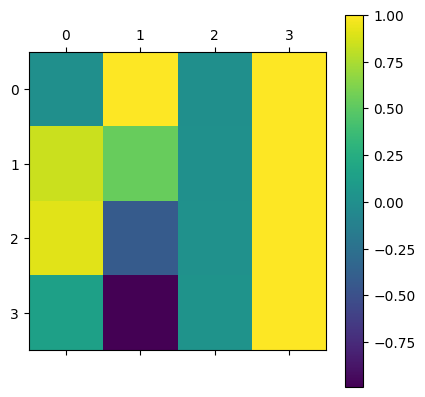

In [80]:
m=encode_position(4,4)
img=plt.matshow(m)
plt.gcf().colorbar(img)

In [ ]:
biased_corpus=[
    "el gato es negro",
    "el gato es negro",
    "el gato es negro",
    "el gato es negro",
    "el gato es negro",
    "el gato es negro",
    "el gato es negro",
    "el gato es negro",
    "el gato es negro",
    "el gato es negro",
    "el gato es blanco",
    "el gato es gris",
    "el perro es negro",
    "el perro es blanco",
    "el perro es blanco",
    "el perro es blanco",
    "el perro es blanco",
    "el perro es blanco",
    "el perro es blanco",
    "el perro es blanco",
    "el perro es blanco",
    "el perro es blanco",
    "el perro es blanco",
    "el perro es gris",
]
special_tokens=["<mask>"]

In [6]:
corpus=corpus[:5000]
print(len(corpus)) # Pa no errarla

5000


In [7]:
extended_corpus=[]
masked=[]
targets=[]
dataset=[]
for frase in corpus:
    frase=frase.split()
    for i in range(len(frase)):
        unmasked=frase[i]
        frase[i]="<mask>"
        extended_corpus.append(" ".join(frase))
        masked.append(unmasked)

        encoded=[]
        for word in frase:
            encoded.append(words.index(''.join(word.split('.')).lower())+1)
        dataset.append(encoded)

        target=[0]*(len(words)+1)
        target[words.index(''.join(unmasked.split('.')).lower())]=1
        targets.append(target)

        frase[i]=unmasked
print(len(extended_corpus))
print(len(dataset))
print(len(targets))

340000
340000
340000


In [8]:
dataset=tf.constant(np.asarray(dataset))
targets=np.asarray(targets)

MemoryError: Unable to allocate 13.1 GiB for an array with shape (340000, 5185) and data type int64

In [10]:
pos_embedding=tf.constant(encode_position(68,68))

@keras.saving.register_keras_serializable()
def positional_encoding(x):
    return keras.ops.add(x,pos_embedding)

d=68
input=Input(name="frase",shape=(68,))
emb = Embedding(input_dim=vocabulary, output_dim=68)(input)
pos=Lambda(positional_encoding,output_shape=(68,68))(emb)
q = Dense(name="wq",units=d)(pos)
k = Dense(name="wk",units=d)(pos)
v = Dense(name="wv",units=d)(pos)
attention = Attention()([q, v, k])
norm = LayerNormalization()(attention)
dense = Dense(d)(norm)
flat = Flatten()(dense)
mlm_target = Dense(vocabulary,activation="softmax")(flat)
model=Model(inputs=input,outputs=mlm_target)
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ frase (InputLayer)  │ (None, 68)        │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 68, 68)    │    352,580 │ frase[0][0]       │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda (Lambda)     │ (None, 68, 68)    │          0 │ embedding[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ wq (Dense)          │ (None, 68, 68)    │      4,692 │ lambda[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ wv (Dense)          │ (None, 68, 68)    │      4,692 │ lambda[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ wk (Dense)          │ (None, 68, 68)    │      4,692 │ lambda[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention           │ (None, 68, 68)    │          0 │ wq[0][0],         │
│ (Attention)         │                   │            │ wv[0][0],         │
│                     │                   │            │ wk[0][0]          │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalization │ (None, 68, 68)    │        136 │ attention[0][0]   │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 68, 68)    │      4,692 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 4624)      │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 5185)      │ 23,980,625 │ flatten[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 24,352,109 (92.90 MB)

 Trainable params: 24,352,109 (92.90 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
print(np.max(dataset.numpy()), np.min(dataset.numpy()))

5184 1


In [ ]:
earlystopping_callback = tf.keras.callbacks.EarlyStopping(monitor="acc",patience=2,restore_best_weights=True)
model.fit(dataset, targets, batch_size=64, epochs=32,verbose=1)
model.save("atencion4.keras")

Epoch 1/32
1063/1063 ━━━━━━━━━━━━━━━━━━━━ 258s 243ms/step - acc: 0.6349 - loss: 2.5075
Epoch 2/32
1063/1063 ━━━━━━━━━━━━━━━━━━━━ 243s 229ms/step - acc: 0.6669 - loss: 1.6091
Epoch 3/32
1063/1063 ━━━━━━━━━━━━━━━━━━━━ 247s 232ms/step - acc: 0.6822 - loss: 1.3977
Epoch 4/32
1063/1063 ━━━━━━━━━━━━━━━━━━━━ 243s 229ms/step - acc: 0.6924 - loss: 1.2657
Epoch 5/32
1063/1063 ━━━━━━━━━━━━━━━━━━━━ 244s 230ms/step - acc: 0.7082 - loss: 1.1352
Epoch 6/32
1063/1063 ━━━━━━━━━━━━━━━━━━━━ 244s 229ms/step - acc: 0.7319 - loss: 1.0042
Epoch 7/32
1063/1063 ━━━━━━━━━━━━━━━━━━━━ 244s 230ms/step - acc: 0.7490 - loss: 0.9089
Epoch 8/32
1063/1063 ━━━━━━━━━━━━━━━━━━━━ 245s 231ms/step - acc: 0.7654 - loss: 0.8358
Epoch 9/32
1063/1063 ━━━━━━━━━━━━━━━━━━━━ 244s 229ms/step - acc: 0.7773 - loss: 0.7744
Epoch 10/32
1063/1063 ━━━━━━━━━━━━━━━━━━━━ 244s 229ms/step - acc: 0.7900 - loss: 0.7246
Epoch 11/32
1063/1063 ━━━━━━━━━━━━━━━━━━━━ 244s 230ms/step - acc: 0.8011 - loss: 0.6784
Epoch 12/32
1063/1063 ━━━━━━━━━━━━━━━━━━━

OSError: [Errno 28] No space left on device

In [15]:
model.fit(dataset, targets, batch_size=64, epochs=2,verbose=1)

Epoch 1/2
1063/1063 ━━━━━━━━━━━━━━━━━━━━ 287s 270ms/step - acc: 0.9039 - loss: 0.3016
Epoch 2/2
1063/1063 ━━━━━━━━━━━━━━━━━━━━ 247s 233ms/step - acc: 0.9076 - loss: 0.2924


In [17]:
model.fit(dataset, targets, batch_size=64, epochs=10,verbose=1)

Epoch 1/10
1063/1063 ━━━━━━━━━━━━━━━━━━━━ 283s 266ms/step - acc: 0.9062 - loss: 0.2908
Epoch 2/10
1063/1063 ━━━━━━━━━━━━━━━━━━━━ 268s 252ms/step - acc: 0.9093 - loss: 0.2802
Epoch 3/10
1063/1063 ━━━━━━━━━━━━━━━━━━━━ 294s 276ms/step - acc: 0.9126 - loss: 0.2746
Epoch 4/10
1063/1063 ━━━━━━━━━━━━━━━━━━━━ 286s 269ms/step - acc: 0.9144 - loss: 0.2628
Epoch 5/10
1063/1063 ━━━━━━━━━━━━━━━━━━━━ 281s 264ms/step - acc: 0.9162 - loss: 0.2584
Epoch 6/10
1063/1063 ━━━━━━━━━━━━━━━━━━━━ 257s 241ms/step - acc: 0.9179 - loss: 0.2533
Epoch 7/10
1063/1063 ━━━━━━━━━━━━━━━━━━━━ 257s 242ms/step - acc: 0.9178 - loss: 0.2541
Epoch 8/10
1063/1063 ━━━━━━━━━━━━━━━━━━━━ 258s 242ms/step - acc: 0.9205 - loss: 0.2432
Epoch 9/10
1063/1063 ━━━━━━━━━━━━━━━━━━━━ 248s 233ms/step - acc: 0.9242 - loss: 0.2387
Epoch 10/10
1063/1063 ━━━━━━━━━━━━━━━━━━━━ 248s 233ms/step - acc: 0.9258 - loss: 0.2306


In [18]:
model.save("atencion3.keras")

In [ ]:
model=tf.keras.models.load_model("atencion2.keras")

In [27]:
model.layers

[<InputLayer name=frase, built=True>,
 <Embedding name=embedding_2, built=True>,
 <Lambda name=lambda_2, built=True>,
 <Dense name=wq, built=True>,
 <Dense name=wv, built=True>,
 <Dense name=wk, built=True>,
 <Attention name=attention_2, built=True>,
 <LayerNormalization name=layer_normalization_2, built=True>,
 <Dense name=dense_4, built=True>,
 <Flatten name=flatten_2, built=True>,
 <Dense name=dense_5, built=True>]

In [28]:
tq_w=tf.constant(model.layers[3].get_weights()[0])
tq_b=tf.constant(model.layers[3].get_weights()[1])

tv_w=tf.constant(model.layers[4].get_weights()[0])
tv_b=tf.constant(model.layers[4].get_weights()[1])

tk_w=tf.constant(model.layers[5].get_weights()[0])
tk_b=tf.constant(model.layers[5].get_weights()[1])

In [29]:
embedding=model.layers[1]
encoding=model.layers[2]

In [31]:
v=encoding(embedding(dataset[1].numpy().reshape(1,68)))
q=np.add(np.matmul(v,tq_w),tq_b)
k=np.add(np.matmul(v,tk_w),tk_b)
v=np.add(np.matmul(v,tv_w),tv_b)

In [32]:
trained_self_attention=model.layers[6]([q,v,k],return_attention_scores=True)
trained_self_attention

(<tf.Tensor: shape=(1, 68, 68), dtype=float32, numpy=
 array([[[ 0.10468787,  0.15928285, -1.5296036 , ..., -0.27042955,
           0.65127504,  1.8622875 ],
         [-0.08431116, -0.07317071,  0.16292726, ..., -0.00988701,
          -0.13958478,  0.12551908],
         [ 0.68785524,  0.349564  , -1.222137  , ..., -1.0238173 ,
           1.0454134 ,  2.1217058 ],
         ...,
         [ 0.10480703,  0.16320248, -1.5245404 , ..., -0.26134622,
           0.6527052 ,  1.8701513 ],
         [ 0.10506909,  0.17219391, -1.5125362 , ..., -0.24007714,
           0.65597516,  1.8884361 ],
         [ 0.10479422,  0.16252203, -1.5254438 , ..., -0.2629324 ,
           0.65245616,  1.868781  ]]], dtype=float32)>,
 <tf.Tensor: shape=(1, 68, 68), dtype=float32, numpy=
 array([[[1.8770667e-08, 6.7209312e-06, 2.1726094e-09, ...,
          1.1934415e-11, 1.5617876e-14, 1.5999483e-20],
         [2.7664892e-14, 2.5440931e-06, 3.1641576e-14, ...,
          4.8734648e-08, 6.0109976e-08, 9.9986303e-01],
   

<Axes: >

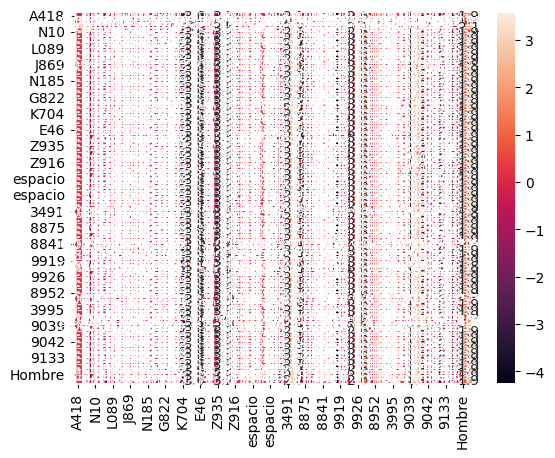

In [34]:
df=pd.DataFrame(trained_self_attention[0].numpy().reshape(68,68),columns=extended_corpus[1].split(),index=extended_corpus[1].split())
sns.heatmap(df,annot=True)

In [66]:
correctos = 0
top10 = 0
for dato in range(100):
    probs=model.predict(dataset[68*dato-1].numpy().reshape(1,68), verbose=0)
    top_indices = np.argsort(probs[0])[-10:][::-1]
    if extended_corpus[68*dato-2].split()[-1] == [words[i] for i in top_indices][0]:
        correctos += 1
    if extended_corpus[68*dato-2].split()[-1] in [words[i] for i in top_indices]:
        top10 += 1
print("Correctos:",correctos)

Correctos: 100


In [87]:
probs=model.predict(dataset[2].numpy().reshape(1,4))
print(extended_corpus[2])
print(words)
print(np.round(probs,3))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
el gato <mask> negro
['el', 'es', 'gato', 'perro', 'negro', 'blanco', 'gris', '<mask>']
[[0. 1. 0. 0. 0. 0. 0.]]


In [88]:
probs=model.predict(dataset[1].numpy().reshape(1,4))
print(extended_corpus[1])
print(words)
print(np.round(probs,3))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
el <mask> es negro
['el', 'es', 'gato', 'perro', 'negro', 'blanco', 'gris', '<mask>']
[[0.    0.    0.861 0.135 0.    0.002 0.002]]


In [89]:
probs=model.predict(dataset[65].numpy().reshape(1,4))
print(extended_corpus[65])
print(words)
print(np.round(probs,3))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
el <mask> es blanco
['el', 'es', 'gato', 'perro', 'negro', 'blanco', 'gris', '<mask>']
[[0.002 0.    0.064 0.932 0.001 0.001 0.001]]
